In [19]:
import os
import surprise
from surprise import Reader, Dataset, GridSearch, accuracy,  SVD, SVDpp, NMF, BaselineOnly, evaluate, KNNWithZScore, KNNWithMeans, KNNBasic
import numpy as np

#for sample_700
file_path = os.path.expanduser('/Users/lamba_s/Desktop/personalization-theory-master/sample_700.csv')
reader = Reader(line_format='user item rating', sep=',')
data0 = Dataset.load_from_file(file_path, reader=reader)

#for sample_1400
file_path = os.path.expanduser('/Users/lamba_s/Desktop/personalization-theory-master/sample_1400.csv')
reader = Reader(line_format='user item rating', sep=',')
data1 = Dataset.load_from_file(file_path, reader=reader)

#for sample_2100
file_path = os.path.expanduser('/Users/lamba_s/Desktop/personalization-theory-master/sample_2100.csv')
reader = Reader(line_format='user item rating', sep=',')
data2 = Dataset.load_from_file(file_path, reader=reader)

#for sample_full
file_path = os.path.expanduser('/Users/lamba_s/Desktop/personalization-theory-master/sampled_data.csv')
reader = Reader(line_format='user item rating', sep=',')
data3 = Dataset.load_from_file(file_path, reader=reader)

data = [data0, data1, data2, data3]



In [2]:
#SVD
import time

def running_time(elapsedtime_SVDtrain, elapsedtime_SVDtest, n_factors, n_epochs, data):
    for i in range(len(data)):
        #Runtime for training
        startTime = time.time()
        training = data[i].build_full_trainset()
        testing = training.build_anti_testset()
        svd = SVD(n_factors=n_factors, n_epochs=n_epochs)
        svd.train(training)
        elapsedtime_SVDtrain.append(time.time() - startTime)
        
        #Runtime for testing
        startTime = time.time()
        predictions = svd.test(testing)
        svd_rmse = accuracy.rmse(predictions, verbose=True)
        elapsedtime_SVDtest.append(time.time() - startTime)
    return elapsedtime_SVDtrain, elapsedtime_SVDtest

In [3]:
elapsedtime_SVDtrain = []
elapsedtime_SVDtest = []
param_grid = {'n_factors': [25, 50, 100, 250], 'n_epochs': [10, 20, 30, 40, 50]}
grid_search = GridSearch(SVD, param_grid, measures=['RMSE'], verbose=False)
grid_search.evaluate(data[3])
param = grid_search.best_params['RMSE']

elapsedtime_SVD = running_time(elapsedtime_SVDtrain, elapsedtime_SVDtest, param['n_factors'],param['n_epochs'], data)
print(elapsedtime_SVD)

[{'n_factors': 25, 'n_epochs': 10}, {'n_factors': 25, 'n_epochs': 20}, {'n_factors': 25, 'n_epochs': 30}, {'n_factors': 25, 'n_epochs': 40}, {'n_factors': 25, 'n_epochs': 50}, {'n_factors': 50, 'n_epochs': 10}, {'n_factors': 50, 'n_epochs': 20}, {'n_factors': 50, 'n_epochs': 30}, {'n_factors': 50, 'n_epochs': 40}, {'n_factors': 50, 'n_epochs': 50}, {'n_factors': 100, 'n_epochs': 10}, {'n_factors': 100, 'n_epochs': 20}, {'n_factors': 100, 'n_epochs': 30}, {'n_factors': 100, 'n_epochs': 40}, {'n_factors': 100, 'n_epochs': 50}, {'n_factors': 250, 'n_epochs': 10}, {'n_factors': 250, 'n_epochs': 20}, {'n_factors': 250, 'n_epochs': 30}, {'n_factors': 250, 'n_epochs': 40}, {'n_factors': 250, 'n_epochs': 50}]
RMSE: 0.4106
RMSE: 0.4305
RMSE: 0.4094
RMSE: 0.4106
([0.16797304153442383, 0.39437198638916016, 0.714893102645874, 0.8063459396362305], [0.7670061588287354, 1.901289939880371, 3.009068012237549, 4.557676076889038])


In [17]:
#SVDpp
import time

def running_time(elapsedtime_SVDpptrain, elapsedtime_SVDpptest, n_factors, n_epochs, data):
    for i in range(len(data)):
        #Runtime for training
        startTime = time.time()
        training = data[i].build_full_trainset()
        testing = training.build_anti_testset()
        svdpp = SVDpp(n_factors=n_factors, n_epochs=n_epochs)
        svdpp.train(training)
        elapsedtime_SVDpptrain.append(time.time() - startTime)
        
        #Runtime for testing
        startTime = time.time()
        predictions = svdpp.test(testing)
        svdpp_rmse = accuracy.rmse(predictions, verbose=True)
        elapsedtime_SVDpptest.append(time.time() - startTime)
    return elapsedtime_SVDpptrain, elapsedtime_SVDpptest

In [18]:
elapsedtime_SVDpptrain = []
elapsedtime_SVDpptest = []
param_grid = {'n_factors': [25, 50, 100, 250], 'n_epochs': [10, 20, 30, 40, 50]}
grid_search = GridSearch(SVDpp, param_grid, measures=['RMSE'], verbose=False)
grid_search.evaluate(data[3])
param = grid_search.best_params['RMSE']

elapsedtime_SVDpp = running_time(elapsedtime_SVDpptrain, elapsedtime_SVDpptest, param['n_factors'],param['n_epochs'], data)
print(elapsedtime_SVDpp)

[{'n_factors': 25, 'n_epochs': 10}, {'n_factors': 25, 'n_epochs': 20}, {'n_factors': 25, 'n_epochs': 30}, {'n_factors': 25, 'n_epochs': 40}, {'n_factors': 25, 'n_epochs': 50}, {'n_factors': 50, 'n_epochs': 10}, {'n_factors': 50, 'n_epochs': 20}, {'n_factors': 50, 'n_epochs': 30}, {'n_factors': 50, 'n_epochs': 40}, {'n_factors': 50, 'n_epochs': 50}, {'n_factors': 100, 'n_epochs': 10}, {'n_factors': 100, 'n_epochs': 20}, {'n_factors': 100, 'n_epochs': 30}, {'n_factors': 100, 'n_epochs': 40}, {'n_factors': 100, 'n_epochs': 50}, {'n_factors': 250, 'n_epochs': 10}, {'n_factors': 250, 'n_epochs': 20}, {'n_factors': 250, 'n_epochs': 30}, {'n_factors': 250, 'n_epochs': 40}, {'n_factors': 250, 'n_epochs': 50}]
RMSE: 0.2524
RMSE: 0.2747
RMSE: 0.2722
RMSE: 0.2683
([0.2007761001586914, 0.5713939666748047, 0.8010189533233643, 1.1078290939331055], [1.6136901378631592, 3.7602341175079346, 6.2048139572143555, 8.825186014175415])


In [20]:
#NMF
import time

def running_time(elapsedtime_NMFtrain, elapsedtime_NMFtest, n_factors, n_epochs, data):
    for i in range(len(data)):
        #Runtime for training
        startTime = time.time()
        training = data[i].build_full_trainset()
        testing = training.build_anti_testset()
        nmf = NMF(n_factors=n_factors, n_epochs=n_epochs)
        nmf.train(training)
        elapsedtime_NMFtrain.append(time.time() - startTime)
        
        #Runtime for testing
        startTime = time.time()
        predictions = nmf.test(testing)
        svdpp_rmse = accuracy.rmse(predictions, verbose=True)
        elapsedtime_NMFtest.append(time.time() - startTime)
    return elapsedtime_NMFtrain, elapsedtime_NMFtest

In [21]:
elapsedtime_NMFtrain = []
elapsedtime_NMFtest = []
param_grid = {'n_factors': [45, 50, 55, 60], 'n_epochs': [45, 50, 55]}
grid_search = GridSearch(NMF, param_grid, measures=['RMSE'], verbose=False)
grid_search.evaluate(data[3])
param = grid_search.best_params['RMSE']

elapsedtime_NMF = running_time(elapsedtime_NMFtrain, elapsedtime_NMFtest, param['n_factors'],param['n_epochs'], data)
print(elapsedtime_NMF)

[{'n_factors': 45, 'n_epochs': 45}, {'n_factors': 45, 'n_epochs': 50}, {'n_factors': 45, 'n_epochs': 55}, {'n_factors': 50, 'n_epochs': 45}, {'n_factors': 50, 'n_epochs': 50}, {'n_factors': 50, 'n_epochs': 55}, {'n_factors': 55, 'n_epochs': 45}, {'n_factors': 55, 'n_epochs': 50}, {'n_factors': 55, 'n_epochs': 55}, {'n_factors': 60, 'n_epochs': 45}, {'n_factors': 60, 'n_epochs': 50}, {'n_factors': 60, 'n_epochs': 55}]
RMSE: 1.1343
RMSE: 1.2006
RMSE: 1.2275
RMSE: 1.2086
([0.26625704765319824, 0.6723451614379883, 1.2200391292572021, 1.471574068069458], [0.6730108261108398, 1.7898991107940674, 2.7961080074310303, 5.1404709815979])


In [22]:
#BaselineOnly
import time

def running_time(elapsedtime_Basetrain, elapsedtime_Basetest, data):
    for i in range(len(data)):
        #Runtime for training
        startTime = time.time()
        training = data[i].build_full_trainset()
        testing = training.build_anti_testset()
        baseline = BaselineOnly()
        baseline.train(training)
        elapsedtime_Basetrain.append(time.time() - startTime)
        
        #Runtime for testing
        startTime = time.time()
        predictions = baseline.test(testing)
        Baseline_rmse = accuracy.rmse(predictions, verbose=True)
        elapsedtime_Basetest.append(time.time() - startTime)
    return elapsedtime_Basetrain, elapsedtime_Basetest

In [23]:
elapsedtime_Basetrain = []
elapsedtime_Basetest = []

elapsedtime_Baseline = running_time(elapsedtime_Basetrain, elapsedtime_Basetest, data)
print(elapsedtime_Baseline)

Estimating biases using als...
RMSE: 0.2759
Estimating biases using als...
RMSE: 0.3069
Estimating biases using als...
RMSE: 0.2972
Estimating biases using als...
RMSE: 0.3075
([0.14966917037963867, 0.3074500560760498, 0.5209431648254395, 0.7233610153198242], [0.7544920444488525, 1.6134190559387207, 2.432184934616089, 3.727689027786255])


In [24]:
#KNNBasic
import time

def running_time(elapsedtime_KnnBasictrain, elapsedtime_KnnBasictest, k, sim, min_support, user_based, data):
    for i in range(len(data)):
        #Runtime for training
        startTime = time.time()
        training = data[i].build_full_trainset()
        testing = training.build_anti_testset()
        knn = KNNBasic(k=k, name=sim, min_support=min_support, user_based=user_based )
        knn.train(training)
        elapsedtime_KnnBasictrain.append(time.time() - startTime)
        
        #Runtime for testing
        startTime = time.time()
        predictions = knn.test(testing)
        KnnBasic_rmse = accuracy.rmse(predictions, verbose=True)
        elapsedtime_KnnBasictest.append(time.time() - startTime)
    return elapsedtime_KnnBasictrain, elapsedtime_KnnBasictest

In [25]:
elapsedtime_KnnBasictrain = []
elapsedtime_KnnBasictest = []
param_grid = {'k': [5, 10, 20], 'sim_options': {'name': ['msd', 'cosine', 'pearson'],
                                                        'min_support': [1, 5], 'user_based': [False]}}
grid_search = GridSearch(KNNBasic, param_grid, measures=['RMSE'], verbose=False)
grid_search.evaluate(data3)
param = grid_search.best_params['RMSE']

elapsedtime_KnnBasic = running_time(elapsedtime_KnnBasictrain, elapsedtime_KnnBasictest, param['k'],param['sim_options']['name'], param['sim_options']['min_support'], param['sim_options']['user_based'], data)
print(elapsedtime_KnnBasic)

[{'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}, 'k': 20}, {'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': False}, 'k': 20}, {'sim_options': {'min_support': 1, 'name': 'cosine', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 1, 'name': 'cosine', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 1, 'name': 'cosine', 'user_based': False}, 'k': 20}, {'sim_options': {'min_support': 5, 'name': 'cosine', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 5, 'name': 'cosine', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 5, 'name': 'cosine', 'user_based': False}, 'k': 20}, {

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5429
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5029
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5185
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.5045
([0.22612500190734863, 0.4367241859436035, 0.7215030193328857, 1.1037380695343018], [2.0910160541534424, 5.7182700634002686, 10.22922682762146, 16.957152128219604])


In [26]:
#KNNMeans
import time

def running_time(elapsedtime_KnnMeanstrain, elapsedtime_KnnMeanstest, k, sim, min_support, user_based, data):
    for i in range(len(data)):
        #Runtime for training
        startTime = time.time()
        training = data[i].build_full_trainset()
        testing = training.build_anti_testset()
        knnm = KNNWithMeans(k=k, name=sim, min_support=min_support, user_based=user_based )
        knnm.train(training)
        elapsedtime_KnnMeanstrain.append(time.time() - startTime)
        
        #Runtime for testing
        startTime = time.time()
        predictions = knnm.test(testing)
        KnnMeans_rmse = accuracy.rmse(predictions, verbose=True)
        elapsedtime_KnnMeanstest.append(time.time() - startTime)
    return elapsedtime_KnnMeanstrain, elapsedtime_KnnMeanstest

In [27]:
elapsedtime_KnnMeanstrain = []
elapsedtime_KnnMeanstest = []
param_grid = {'k': [5, 10, 20], 'sim_options': {'name': ['msd', 'cosine', 'pearson'],
                                                        'min_support': [1, 5], 'user_based': [False]}}
grid_search = GridSearch(KNNWithMeans, param_grid, measures=['RMSE'], verbose=False)
grid_search.evaluate(data3)
param = grid_search.best_params['RMSE']

elapsedtime_KnnM = running_time(elapsedtime_KnnMeanstrain, elapsedtime_KnnMeanstest, param['k'],param['sim_options']['name'], param['sim_options']['min_support'], param['sim_options']['user_based'], data)
print(elapsedtime_KnnM)

[{'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}, 'k': 20}, {'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': False}, 'k': 20}, {'sim_options': {'min_support': 1, 'name': 'cosine', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 1, 'name': 'cosine', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 1, 'name': 'cosine', 'user_based': False}, 'k': 20}, {'sim_options': {'min_support': 5, 'name': 'cosine', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 5, 'name': 'cosine', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 5, 'name': 'cosine', 'user_based': False}, 'k': 20}, {

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1826
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2152
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2162
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2151
([0.23646092414855957, 0.38274502754211426, 0.7416298389434814, 1.0361111164093018], [1.908186912536621, 6.476806879043579, 9.955384016036987, 16.401561975479126])


In [28]:
#KNNZScore
import time

def running_time(elapsedtime_KnnZtrain, elapsedtime_KnnZtest, k, sim, min_support, user_based, data):
    for i in range(len(data)):
        #Runtime for training
        startTime = time.time()
        training = data[i].build_full_trainset()
        testing = training.build_anti_testset()
        knnz = KNNWithZScore(k=k, name=sim, min_support=min_support, user_based=user_based )
        knnz.train(training)
        elapsedtime_KnnZtrain.append(time.time() - startTime)
        
        #Runtime for testing
        startTime = time.time()
        predictions = knnz.test(testing)
        KnnZ_rmse = accuracy.rmse(predictions, verbose=True)
        elapsedtime_KnnZtest.append(time.time() - startTime)
    return elapsedtime_KnnZtrain, elapsedtime_KnnZtest

In [29]:
elapsedtime_KnnZtrain = []
elapsedtime_KnnZtest = []
param_grid = {'k': [5, 10, 20], 'sim_options': {'name': ['msd', 'cosine', 'pearson'],
                                                        'min_support': [1, 5], 'user_based': [False]}}
grid_search = GridSearch(KNNWithZScore, param_grid, measures=['RMSE'], verbose=False)
grid_search.evaluate(data3)
param = grid_search.best_params['RMSE']

elapsedtime_KnnZ = running_time(elapsedtime_KnnZtrain, elapsedtime_KnnZtest, param['k'],param['sim_options']['name'], param['sim_options']['min_support'], param['sim_options']['user_based'], data)
print(elapsedtime_KnnZ)

[{'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 1, 'name': 'msd', 'user_based': False}, 'k': 20}, {'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 5, 'name': 'msd', 'user_based': False}, 'k': 20}, {'sim_options': {'min_support': 1, 'name': 'cosine', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 1, 'name': 'cosine', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 1, 'name': 'cosine', 'user_based': False}, 'k': 20}, {'sim_options': {'min_support': 5, 'name': 'cosine', 'user_based': False}, 'k': 5}, {'sim_options': {'min_support': 5, 'name': 'cosine', 'user_based': False}, 'k': 10}, {'sim_options': {'min_support': 5, 'name': 'cosine', 'user_based': False}, 'k': 20}, {

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.1834
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2165
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2185
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.2176
([0.25388598442077637, 0.5298380851745605, 0.8562772274017334, 1.3789770603179932], [2.57179594039917, 6.734009027481079, 10.726859092712402, 19.361468076705933])


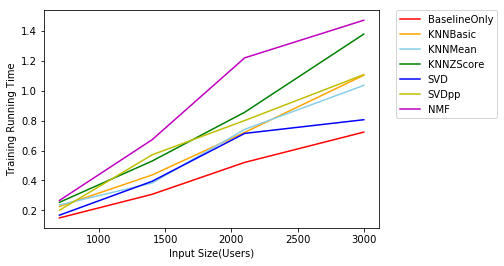

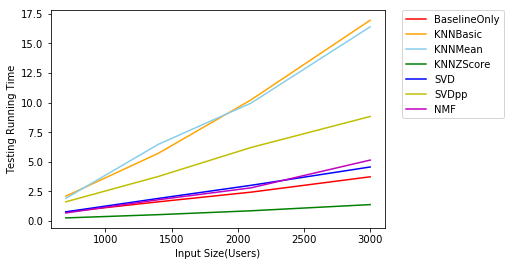

In [30]:
import matplotlib.pyplot as plt
users_N = [700, 1400, 2100, 3000]
plt.plot(users_N, elapsedtime_Basetrain, 'r', label = "BaselineOnly")
plt.plot(users_N, elapsedtime_KnnBasictrain, 'orange', label = "KNNBasic")
plt.plot(users_N, elapsedtime_KnnMeanstrain, 'skyblue', label = "KNNMean")
plt.plot(users_N, elapsedtime_KnnZtrain, 'g', label = "KNNZScore")
plt.plot( users_N, elapsedtime_SVDtrain,'b', label = "SVD")
plt.plot( users_N,elapsedtime_SVDpptrain, 'y', label = "SVDpp")
plt.plot( users_N,elapsedtime_NMFtrain, 'm', label = "NMF")

plt.ylabel('Training Running Time')
plt.xlabel('Input Size(Users)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

plt.plot(users_N, elapsedtime_Basetest, 'r', label = "BaselineOnly")
plt.plot(users_N, elapsedtime_KnnBasictest, 'orange', label = "KNNBasic")
plt.plot(users_N, elapsedtime_KnnMeanstest, 'skyblue', label = "KNNMean")
plt.plot(users_N, elapsedtime_KnnZtrain, 'g', label = "KNNZScore")
plt.plot( users_N, elapsedtime_SVDtest,'b', label = "SVD")
plt.plot( users_N,elapsedtime_SVDpptest, 'y', label = "SVDpp")
plt.plot( users_N,elapsedtime_NMFtest, 'm', label = "NMF")

plt.ylabel('Testing Running Time')
plt.xlabel('Input Size(Users)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()